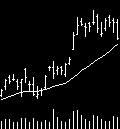

In [3]:
from PIL import Image, ImageDraw
import pandas as pd

df = pd.read_csv('AAPL.csv')  # Ensure the path to the CSV file is correct

AAPL1 = df[140:170]  # Data for 20 entries, not 30 as the comment stated

# Setup
bar_width = 3
spacing = 1
height_factor = 100  # Scaling factor for prices
volume_height = 20  # Height allocated for volume bars
space_between_sections = 10  # Space between OHLC and volume sections

# Calculate image dimensions
num_bars = len(AAPL1)
image_width = num_bars * (bar_width + spacing)
max_price = AAPL1[['Open', 'High', 'Low', 'Close', '20-day Avg.']].max().max()
min_price = AAPL1[['Open', 'High', 'Low', 'Close', '20-day Avg.']].min().min()
max_volume = AAPL1['Volume'].max()
volume_scale = volume_height / max_volume
image_height = int((max_price - min_price) * height_factor) + volume_height + space_between_sections + 10

# Create a blank image and get drawing context
image_black_bg = Image.new("RGB", (image_width, image_height), "black")
draw_black_bg = ImageDraw.Draw(image_black_bg)

# Reset index for AAPL1 to help with plotting
AAPL1 = AAPL1.reset_index(drop=True)

# Draw OHLC sticks and volume bars
for index, row in AAPL1.iterrows():
    open_px = int((row['Open'] - min_price) * height_factor)
    high_px = int((row['High'] - min_price) * height_factor)
    low_px = int((row['Low'] - min_price) * height_factor)
    close_px = int((row['Close'] - min_price) * height_factor)
    
    # Calculate positions
    x_position = index * (bar_width + spacing)
    open_y = image_height - open_px - volume_height - space_between_sections
    high_y = image_height - high_px - volume_height - space_between_sections
    low_y = image_height - low_px - volume_height - space_between_sections
    close_y = image_height - close_px - volume_height - space_between_sections
    
    # Draw high to low line
    draw_black_bg.line([(x_position + 1, high_y), (x_position + 1, low_y)], fill="white")
    
    # Draw open tick
    draw_black_bg.line([(x_position, open_y), (x_position + 1, open_y)], fill="white")
    
    # Draw close tick
    draw_black_bg.line([(x_position + 2, close_y), (x_position + 1, close_y)], fill="white")

    # Draw volume bar
    volume_height_px = int(row['Volume'] * volume_scale)
    volume_top = image_height - volume_height_px
    volume_bottom = image_height
    draw_black_bg.line([(x_position + 1, volume_top), (x_position + 1, volume_bottom)], fill="white")

# Draw 20-day moving average line
previous_ma_y = None
for index, row in AAPL1.iterrows():
    if pd.notna(row['20-day Avg.']):  # Ensure the MA value exists
        ma_y = image_height - int((row['20-day Avg.'] - min_price) * height_factor) - volume_height - space_between_sections
        x_position = index * (bar_width + spacing) + 1
        if previous_ma_y is not None:
            draw_black_bg.line([(x_position - (bar_width + spacing), previous_ma_y), (x_position, ma_y)], fill="White")
        previous_ma_y = ma_y

image_black_bg  # Display the image